# Reconocimiento de patrones y aprendizaje automatizado

Practica 1

Alumono: **Fernando Huitron Martinez**
No. cuenta: 421012972

In [3]:
from google.colab import files
uploaded = files.upload()
import pandas as pd #Importamos pandas
# Leer el csv de datos
datos = pd.read_csv("datos.csv")
datos

Saving datos.csv to datos.csv


,nombre,apellido,horas_dedicadas,calificaciones_obtenida
0,Sofía Sánchez,Rodríguez,52,45.0
1,Luis Romero,Romero,2,NaN
2,Juan Díaz,López,170,100.0
3,Miguel Hernández,Álvarez,42,NaN
4,Juan González,Díaz,125,70.0
5,Juan García,Fernández,47,40.0
6,Luis Romero,López,149,100.0
7,Miguel Fernández,Romero,162,80.0
8,Carmen Pérez,Álvarez,139,45.0
9,Juan Rodríguez,Romero,18,30.0



# **I. Min., Max., Media y Desviacion estandar**

 Numero de horas estudiadas

In [4]:
# Obtener el minimo de hrs estudiadas
datos["horas_dedicadas"].min()

2

In [5]:
# Obtener el maximo de hrs estudiadas
datos["horas_dedicadas"].max()

178

In [6]:
# Obtener la media de hrs estudiadas
datos["horas_dedicadas"].mean()

99.4

In [7]:
# Obtener la desviacion estandar de hrs estudiadas
datos["horas_dedicadas"].std()

58.129075974801204

 Calificaciones Obtenidas

In [8]:
# Obtener el minimo de calificaciones obtenidas
datos["calificaciones_obtenida"].min()

0.0

In [9]:
# Obtener el maximo de calificaciones obtenidas
datos["calificaciones_obtenida"].max()

100.0

In [10]:
# Obtener la media de calificaciones obtenidas
datos["calificaciones_obtenida"].mean()

64.05555555555556

In [11]:
# Obtener la desviacion estandar de calificaciones obtenidas
datos["calificaciones_obtenida"].std()

33.539217119177366

# **II. Regresion lineal**

In [12]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
#Quitar valores nulos .fillna()
datosTotal = datos.fillna(0)
datosTotal

,nombre,apellido,horas_dedicadas,calificaciones_obtenida
0,Sofía Sánchez,Rodríguez,52,45.0
1,Luis Romero,Romero,2,0.0
2,Juan Díaz,López,170,100.0
3,Miguel Hernández,Álvarez,42,0.0
4,Juan González,Díaz,125,70.0
5,Juan García,Fernández,47,40.0
6,Luis Romero,López,149,100.0
7,Miguel Fernández,Romero,162,80.0
8,Carmen Pérez,Álvarez,139,45.0
9,Juan Rodríguez,Romero,18,30.0


In [13]:
# obtener la lista de Horas dedicadas y Calificaciones convertirlas a array de numpy
hrs = np.array(datosTotal["horas_dedicadas"])
print(hrs)
calf = np.array(datosTotal["calificaciones_obtenida"])
calf


[ 52   2 170  42 125  47 149 162 139  18  30 152  51 164  93 162  55 178
  97 100]


array([ 45.,   0., 100.,   0.,  70.,  40., 100.,  80.,  45.,  30.,   0.,
       100.,   0.,  98.,  60., 100.,  40.,  70.,  80.,  95.])

In [14]:
#Aplicar reshape() al array de longitudes para transponerlo
hrs = hrs.reshape(-1,1)
hrs

array([[ 52],
       [  2],
       [170],
       [ 42],
       [125],
       [ 47],
       [149],
       [162],
       [139],
       [ 18],
       [ 30],
       [152],
       [ 51],
       [164],
       [ 93],
       [162],
       [ 55],
       [178],
       [ 97],
       [100]])

In [15]:
# Crear el modelo de regresión lineal
modelo = LinearRegression()

# Entrenar el modelo con los datos
modelo.fit(hrs,calf) #Fit entrena


LinearRegression()

Realizar una prediccion con el M. de Regresion Lineal  

No. Cuenta: 421012972

**n = 4+2+1+0+1+2+9+7+2 = 28**

In [16]:
modelo.predict(np.array([[28]]))

# La calificacion esperada (1-100) de acuerdo al modelo de regresion lineal a 28 hrs de estudio es:


array([18.73770732])

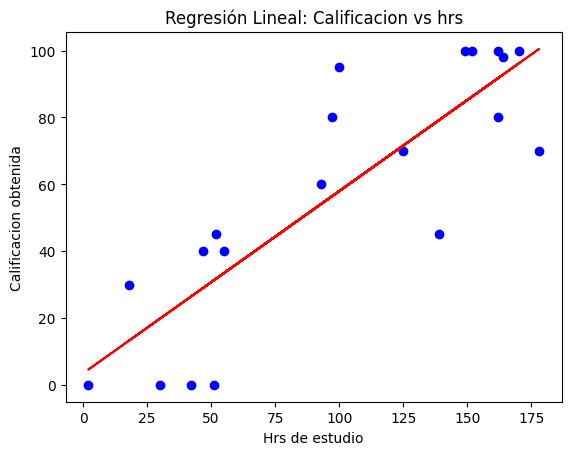

In [17]:
# Graficar los datos y la línea de regresión
import matplotlib.pyplot as plt
plt.scatter(hrs, calf, color='blue')
plt.plot(hrs, modelo.predict(hrs), color='red')
plt.title('Regresión Lineal: Calificacion vs hrs')
plt.xlabel('Hrs de estudio')
plt.ylabel('Calificacion obtenida')
plt.show()

# III. Evaluar la bondad de ajuste deL Modelo de regresion Lineal

Para evaluar la bondad de ajuste de un modelo de regresión lineal, hay varias métricas comunes que puedes usar:

**Error Cuadrático Medio (MSE):** Mide el promedio de los errores al cuadrado. Cuanto menor sea el MSE, mejor será el ajuste del modelo.

**R-cuadrado (R^2):** Mide la proporción de la variabilidad en la variable dependiente que es predecible a partir de la variable independiente. Un valor de 1 indica un ajuste perfecto, mientras que un valor de 0 indica que el modelo no explica la variabilidad de los datos.

**Error Absoluto Medio (MAE):** Mide el promedio de los valores absolutos de los errores entre las observaciones y las predicciones. Cuanto menor sea el MAE, mejor será el ajuste del modelo.

In [18]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Predicciones del modelo sobre los datos de entrenamiento
predicciones = modelo.predict(hrs)

# Calcular el coeficiente de determinación R^2
r2 = r2_score(calf, predicciones)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(calf, predicciones)

# Calcular el error absoluto medio (MAE)
mae = mean_absolute_error(calf, predicciones)

# Mostrar las métricas
print("Coeficiente de determinación (R^2):", r2)
print("Error cuadrático medio (MSE):", mse)
print("Error absoluto medio (MAE):", mae)


Coeficiente de determinación (R^2): 0.7193358137770824
Error cuadrático medio (MSE): 372.0000306849759
Error absoluto medio (MAE): 16.012165580491214
